# Titanic Survival Prediction by Logistic Regression 

In [622]:
# import libaries

In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [624]:
# import data

In [625]:
df_train=pd.read_csv(r'C:\Users\SURAJ\Desktop\jupyter\projects\logistic regression\train.csv')
df_test=pd.read_csv(r'C:\Users\SURAJ\Desktop\jupyter\projects\logistic regression\test.csv')

In [626]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [627]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [628]:
# check data details

In [629]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [630]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [631]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [632]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [633]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [634]:
# from info in df_train & df_test we get to know that we have to convert some categorical variables in numerical form like sex and embarked and age cannot be in float so we convert it into int

In [635]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [636]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [637]:
# check null values present in data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [638]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [639]:
# after checking we got to know 
#there are 177 null values present in age column, 687 in cabin column and 2 in embarked column in df_train &
#there are 86 null values present in age column, 1 in Fare column and 327 in cabin column in df_test
#so we can fill this nan values

In [640]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [641]:
df_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [642]:
# drop unwanted columns
df_train.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

In [643]:
df_test.drop(columns=['Name','Cabin','Ticket'], axis=1, inplace=True)

In [644]:
#fill Nan values in both the data

In [645]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [646]:
df_train['Age']=df_train['Age'].astype('int')

In [647]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [648]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [649]:
df_test['Age']=df_train['Age'].astype('int')

In [650]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 24.6+ KB


In [651]:
df_train['Age'].isnull().sum()

0

In [652]:
df_test['Age'].isnull().sum()

0

In [653]:
#drop nan values because there is only 2 nan values in train data which do not impact on data
df_train=df_train.dropna()

In [654]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [655]:
df_train.shape

(889, 8)

In [656]:
#drop nan values because there is only 1 nan values in test data which do not impact on data
df_test=df_test.dropna()

In [657]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [658]:
df_test.shape

(417, 8)

In [659]:
test_pass=df_test['PassengerId']
test_pass

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 417, dtype: int64

In [660]:
# convert categorical data into numerical data (i.e. sex and embarked) on both data
#df = pd.concat([df,pd.get_dummies(df.Sex),
                    #pd.get_dummies(df.Embarked)], axis = 1)

In [661]:
#df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [662]:
# convert categorical data into numerical data (i.e. sex and embarked) on both data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'].values)
df_train['Embarked']=le.fit_transform(df_train['Embarked'].values)
df_test['Sex']=le.fit_transform(df_test['Sex'].values)
df_test['Embarked']=le.fit_transform(df_test['Embarked'].values)

In [663]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [664]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,22,0,0,7.8292,1
1,893,3,0,38,1,0,7.0000,2
2,894,2,1,26,0,0,9.6875,1
3,895,3,1,35,0,0,8.6625,2
4,896,3,0,35,1,1,12.2875,2


In [665]:
df_train.shape, df_test.shape

((889, 8), (417, 8))

# Data Visualiazation on train data

In [666]:
df_train_features=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']

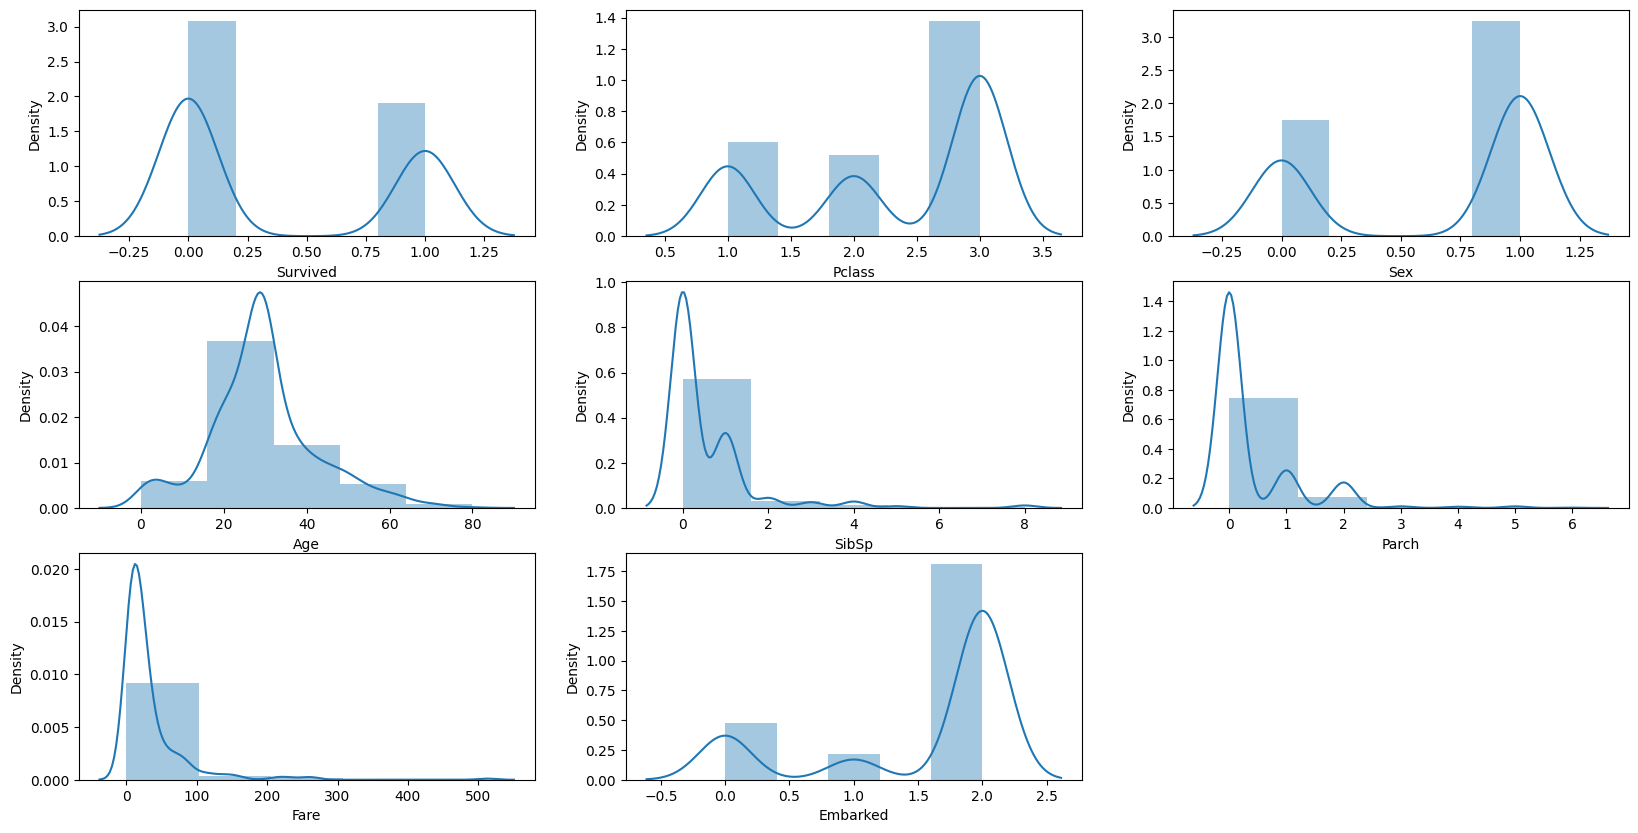

In [667]:
plt.figure(figsize=(20,10))
k=1
for feature in df_train_features:
  plt.subplot(3,3,k)
  sns.distplot(df_train[feature], bins=5, kde=True)
  k=k+1

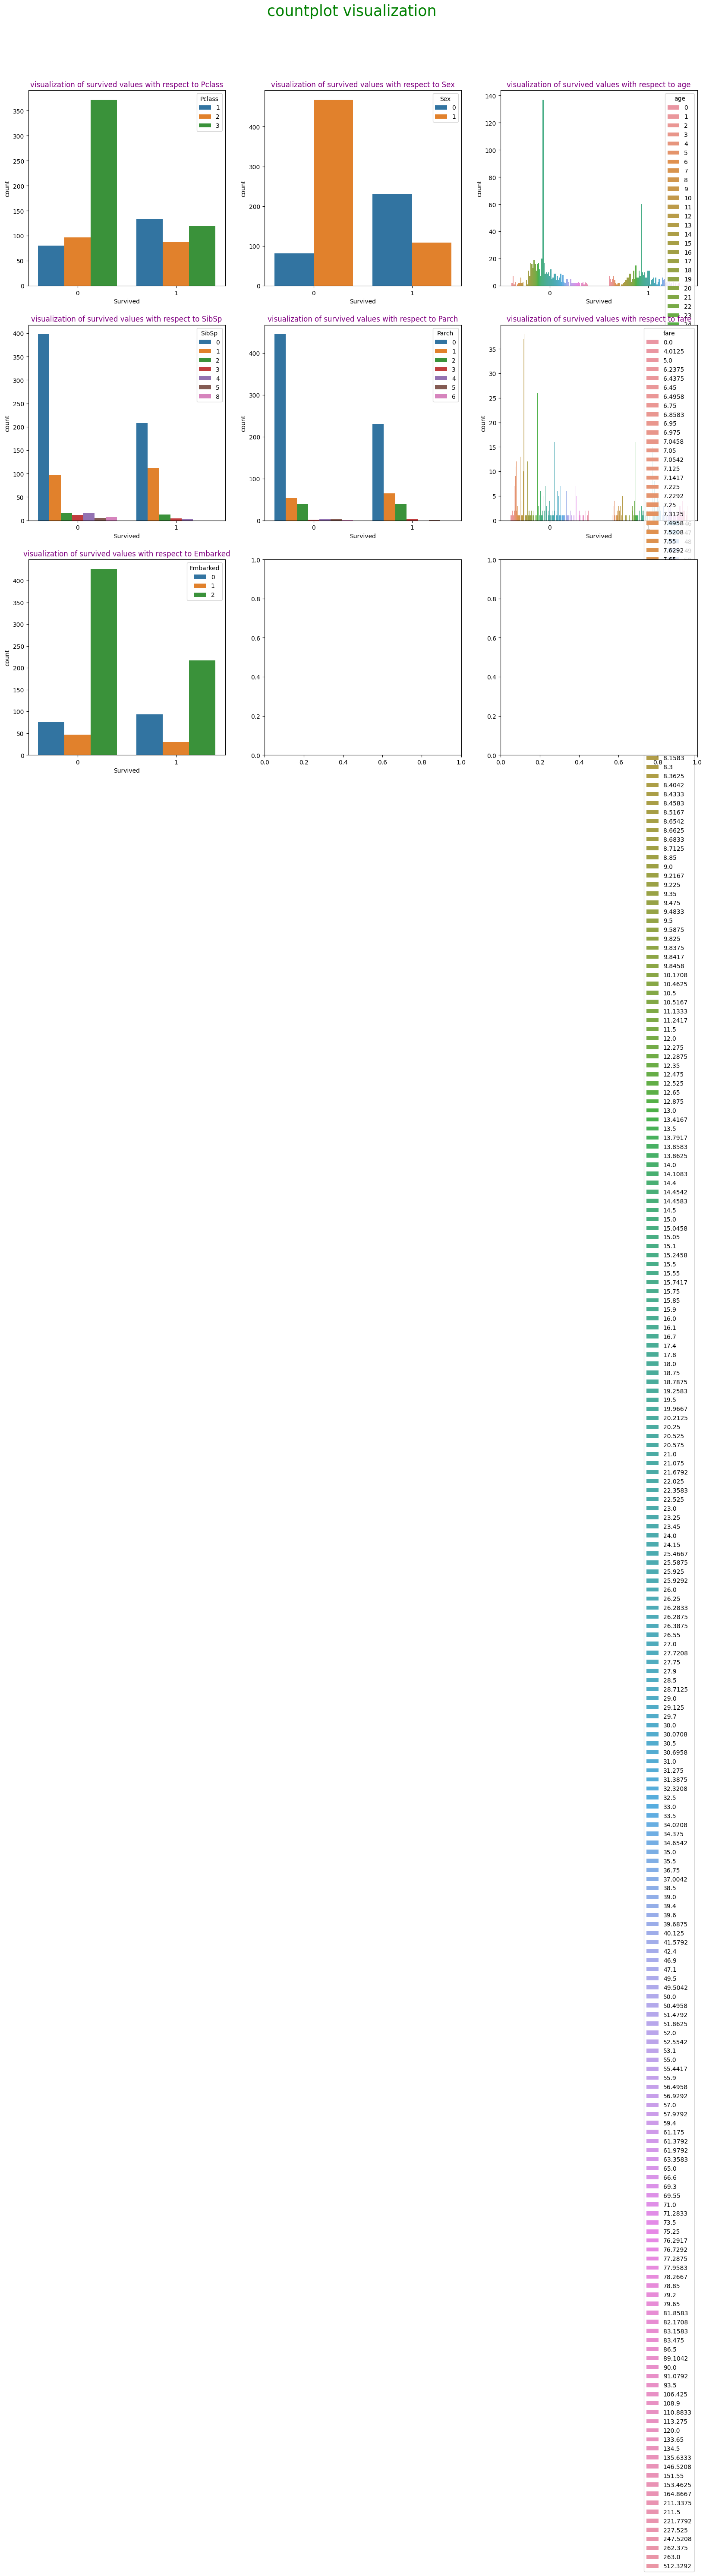

In [668]:
fig,axs=plt.subplots(nrows=3, ncols=3, figsize=(20,20));
fig.suptitle("countplot visualization", c='green', size=25)

sns.countplot(x="Survived", data=df_train, hue='Pclass', ax=axs[0][0])
axs[0][0].set_title("visualization of survived values with respect to Pclass", c='purple')
axs[0][0].legend(title="Pclass", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Sex', ax=axs[0][1])
axs[0][1].set_title("visualization of survived values with respect to Sex", c='purple')
axs[0][1].legend(title="Sex", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Age', ax=axs[0][2])
axs[0][2].set_title("visualization of survived values with respect to age", c='purple')
axs[0][2].legend(title="age", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='SibSp', ax=axs[1][0])
axs[1][0].set_title("visualization of survived values with respect to SibSp", c='purple')
axs[1][0].legend(title="SibSp", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Parch', ax=axs[1][1])
axs[1][1].set_title("visualization of survived values with respect to Parch", c='purple')
axs[1][1].legend(title="Parch", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Fare', ax=axs[1][2])
axs[1][2].set_title("visualization of survived values with respect to fare", c='purple')
axs[1][2].legend(title="fare", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Embarked', ax=axs[2][0])
axs[2][0].set_title("visualization of survived values with respect to Embarked", c='purple')
axs[2][0].legend(title="Embarked", loc="upper right")

plt.show()

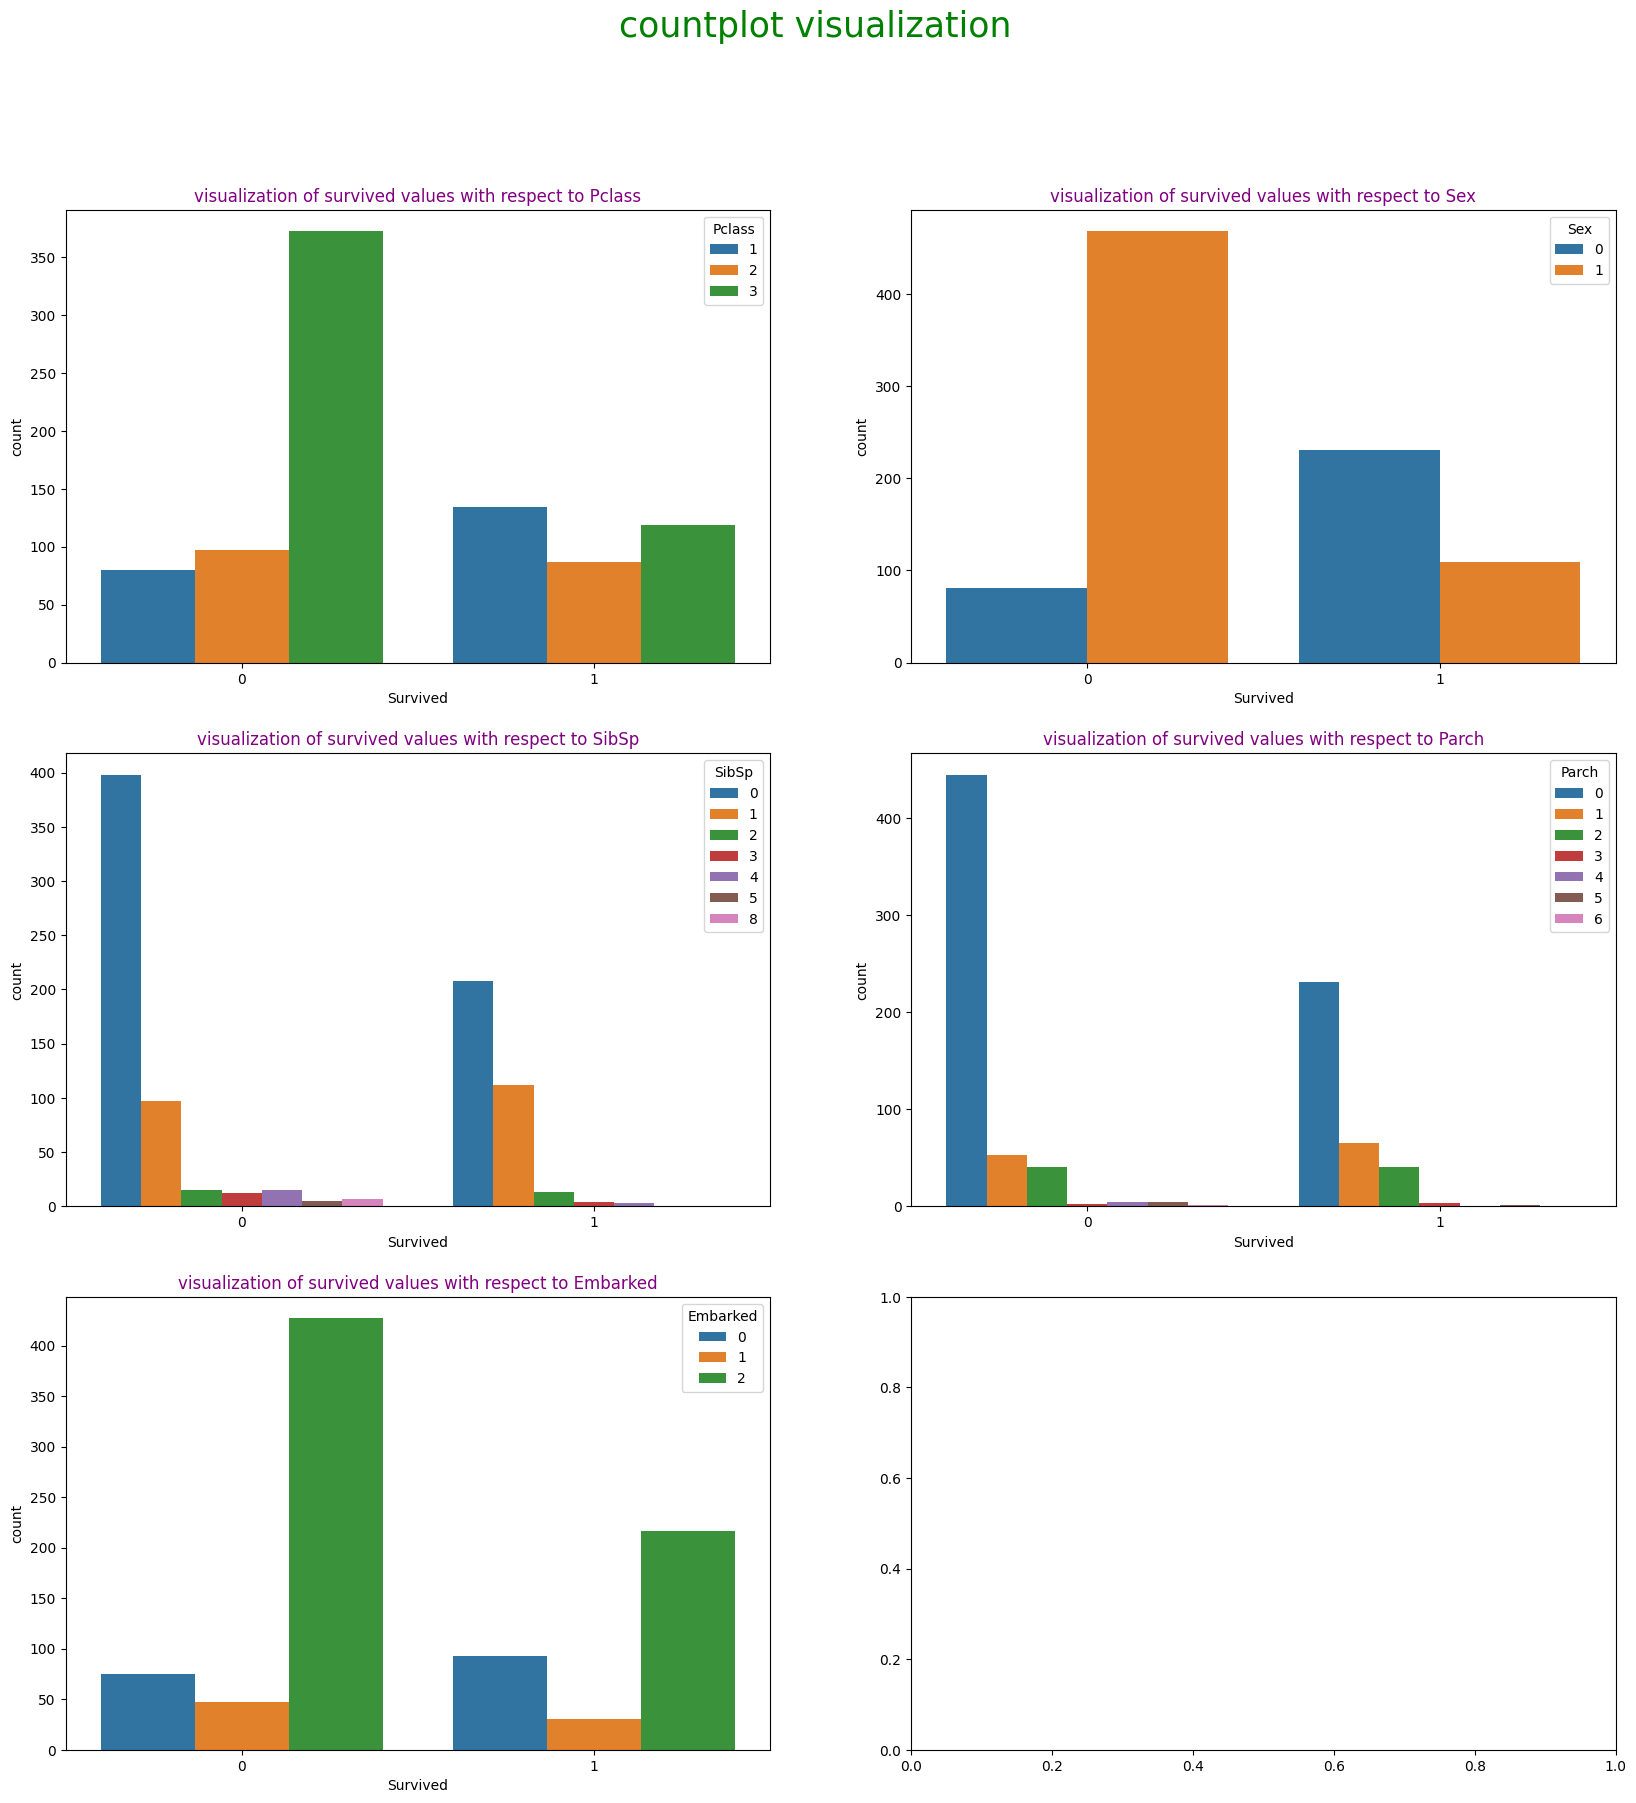

In [669]:
# we dont want to see fare and age countplot due to its many uniques
fig,axs=plt.subplots(nrows=3, ncols=2, figsize=(20,20));
fig.suptitle("countplot visualization", c='green', size=25)

sns.countplot(x="Survived", data=df_train, hue='Pclass', ax=axs[0][0])
axs[0][0].set_title("visualization of survived values with respect to Pclass", c='purple')
axs[0][0].legend(title="Pclass", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Sex', ax=axs[0][1])
axs[0][1].set_title("visualization of survived values with respect to Sex", c='purple')
axs[0][1].legend(title="Sex", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='SibSp', ax=axs[1][0])
axs[1][0].set_title("visualization of survived values with respect to SibSp", c='purple')
axs[1][0].legend(title="SibSp", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Parch', ax=axs[1][1])
axs[1][1].set_title("visualization of survived values with respect to Parch", c='purple')
axs[1][1].legend(title="Parch", loc="upper right")

sns.countplot(x="Survived", data=df_train, hue='Embarked', ax=axs[2][0])
axs[2][0].set_title("visualization of survived values with respect to Embarked", c='purple')
axs[2][0].legend(title="Embarked", loc="upper right")

plt.show()

# # Data Visualiazation on test data

In [670]:
df_test_features=['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']

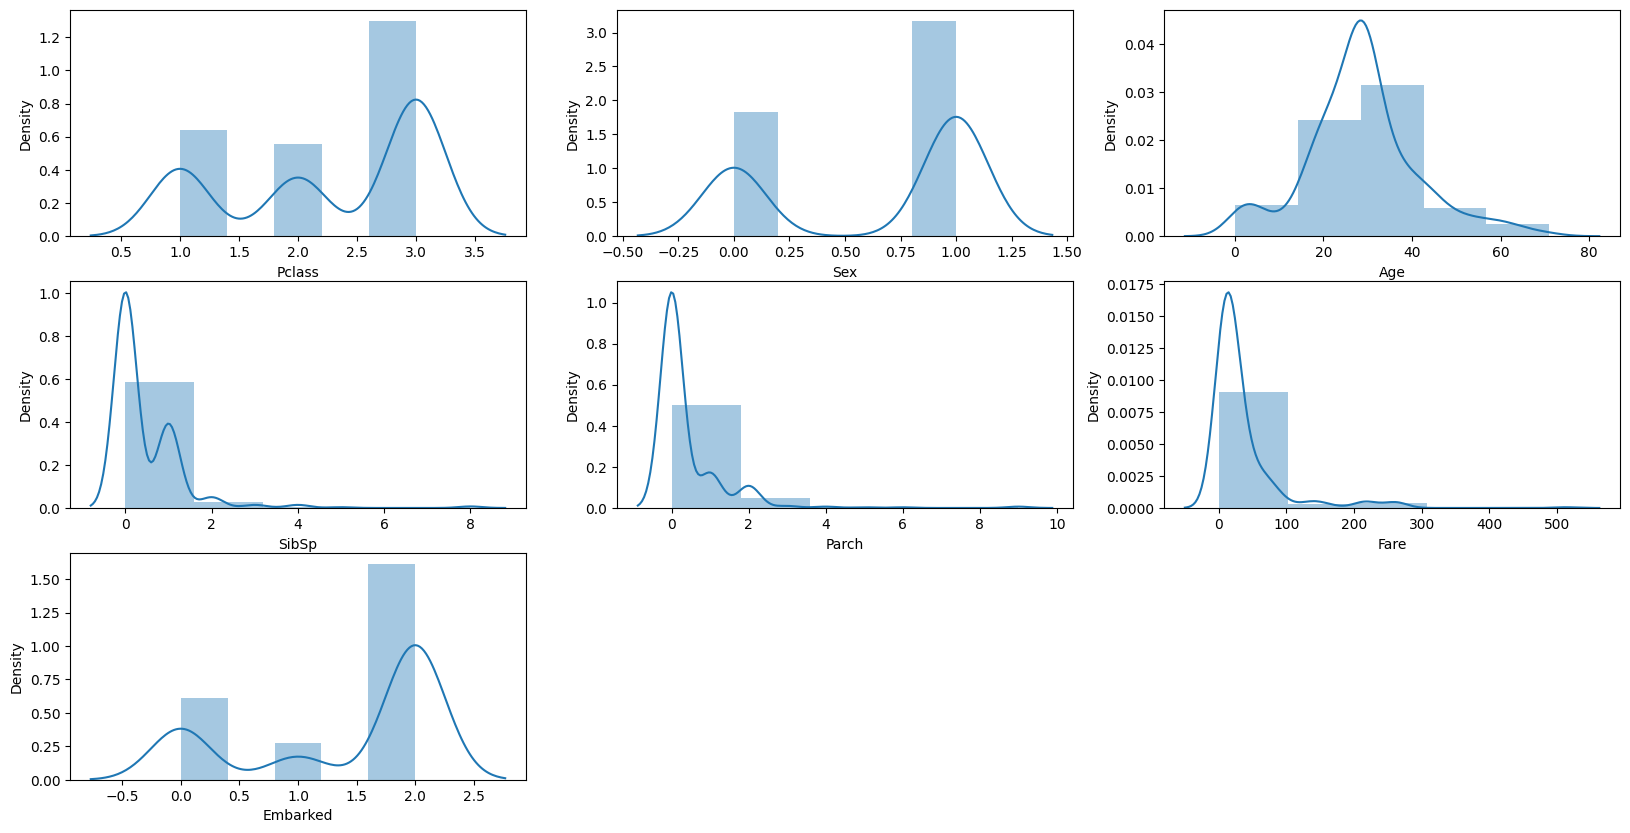

In [671]:
plt.figure(figsize=(20,10))
k=1
for feature in df_test_features:
  plt.subplot(3,3,k)
  sns.distplot(df_test[feature], bins=5, kde=True)
  k=k+1

<AxesSubplot: >

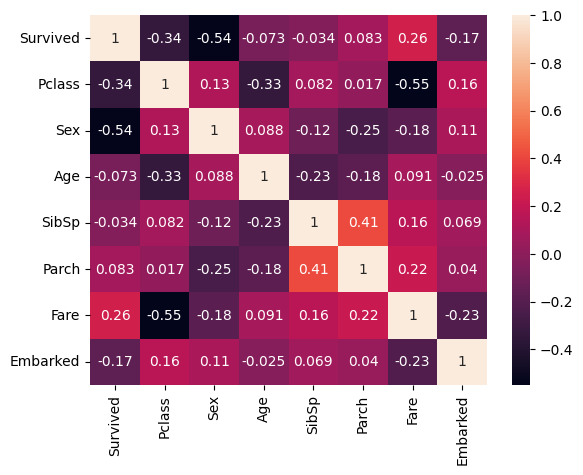

In [672]:
#check correlation
sns.heatmap(data=df_train.corr(),annot=True)

In [673]:
# skewness & kurtosis on train data
df_train.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.456947
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

In [674]:
df_train.kurtosis()

Survived    -1.769179
Pclass      -1.269437
Sex         -1.612225
Age          0.999845
SibSp       17.838972
Parch        9.750592
Fare        33.508477
Embarked    -0.216100
dtype: float64

In [675]:
df_train['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [676]:
df_train['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [677]:
df_train['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [678]:
df_train['Age'].value_counts()

29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: Age, Length: 71, dtype: int64

In [679]:
df_train['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [680]:
df_train['Embarked'].value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

In [681]:
df_train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64

In [682]:
# fare column is also not important so we can drop it too on both data

df_train.drop(columns=['Fare'],axis=1,inplace=True)

In [683]:
df_train.reset_index(drop=True, inplace=True)

In [684]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22,1,0,2
1,1,1,0,38,1,0,0
2,1,3,0,26,0,0,2
3,1,1,0,35,1,0,2
4,0,3,1,35,0,0,2
...,...,...,...,...,...,...,...
884,0,2,1,27,0,0,2
885,1,1,0,19,0,0,2
886,0,3,0,29,1,2,2
887,1,1,1,26,0,0,0


In [685]:
df_test.drop(columns=['PassengerId','Fare'],axis=1,inplace=True)

In [686]:
df_test.reset_index(drop=True, inplace=True)

In [687]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22,0,0,1
1,3,0,38,1,0,2
2,2,1,26,0,0,1
3,3,1,35,0,0,2
4,3,0,35,1,1,2
...,...,...,...,...,...,...
412,3,1,29,0,0,2
413,1,0,44,0,0,0
414,3,1,29,0,0,2
415,3,1,34,0,0,2


# split data into x and y

In [688]:
x_train=df_train.iloc[:, 1:7]
x_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22,1,0,2
1,1,0,38,1,0,0
2,3,0,26,0,0,2
3,1,0,35,1,0,2
4,3,1,35,0,0,2
...,...,...,...,...,...,...
884,2,1,27,0,0,2
885,1,0,19,0,0,2
886,3,0,29,1,2,2
887,1,1,26,0,0,0


In [689]:
y_train=df_train.loc[:, 'Survived']
y_train.values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [690]:
x_test=df_test

In [691]:
x_test.shape

(417, 6)

# Standard Scaler

In [692]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [693]:
x_train.shape, y_train.shape, x_test.shape

((889, 6), (889,), (417, 6))

# Model prediction by using Logistic Regression

In [694]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [695]:
model.score(x_train, y_train)

0.8031496062992126

# Now predict the Survival on test data

In [696]:
final_pred=model.predict(x_test)

In [697]:
final_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [698]:
output=pd.DataFrame({'PassengerId' : test_pass, 'Survived': final_pred})

In [699]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [701]:
output.to_csv("titanic test result.csv", index=False)